In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re

### TASK 1 

In [4]:
df = pd.read_csv('all_upwork_jobs_2024-02-07-2024-03-24.csv')

# Preview data
df.head()

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India


In [5]:
# Create average hourly rate
df['avg_hourly_rate'] = (df['hourly_low'] + df['hourly_high']) / 2

# Create a unified salary column
df['salary'] = df['avg_hourly_rate']

# Fill fixed-price jobs salary using budget
df.loc[df['salary'].isnull(), 'salary'] = df['budget']

df[['title', 'salary']].head()

,title,salary
0,Experienced Media Buyer For Solar Pannel and R...,500.0
1,Full Stack Developer,1100.0
2,SMMA Bubble App,20.0
3,Talent Hunter Specialized in Marketing,NaN
4,Data Engineer,650.0


In [6]:
def clean_title(title):
    title = str(title)          # Convert NaN to string
    title = title.lower()
    title = re.sub(r'[^a-zA-Z ]', '', title)
    return title

df['clean_title'] = df['title'].apply(clean_title)

df[['title', 'clean_title']].head()

,title,clean_title
0,Experienced Media Buyer For Solar Pannel and R...,experienced media buyer for solar pannel and r...
1,Full Stack Developer,full stack developer
2,SMMA Bubble App,smma bubble app
3,Talent Hunter Specialized in Marketing,talent hunter specialized in marketing
4,Data Engineer,data engineer


In [7]:
df['title'].isnull().sum()

1

Some job titles had missing values, so I handled them safely by converting values to strings before text preprocessing.

In [9]:
keywords = [
    'data', 'developer', 'engineer', 'designer', 'marketing',
    'seo', 'python', 'java', 'analyst', 'ai', 'machine', 'react'
]

for word in keywords:
    df[word] = df['clean_title'].apply(lambda x: 1 if word in x else 0)

df[keywords].head()

,data,developer,engineer,designer,marketing,seo,python,java,analyst,ai,machine,react
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,0,0


In [10]:
correlation = {}

for word in keywords:
    correlation[word] = df[word].corr(df['salary'])

correlation_df = pd.DataFrame.from_dict(
    correlation, orient='index', columns=['Correlation with Salary']
).sort_values(by='Correlation with Salary', ascending=False)

correlation_df

,Correlation with Salary
developer,0.004425
engineer,0.002663
ai,0.002084
machine,0.000843
marketing,0.000445
analyst,-0.000216
java,-0.000974
react,-0.001097
designer,-0.001424
python,-0.001470


This tells which keywords are linked to higher pay.

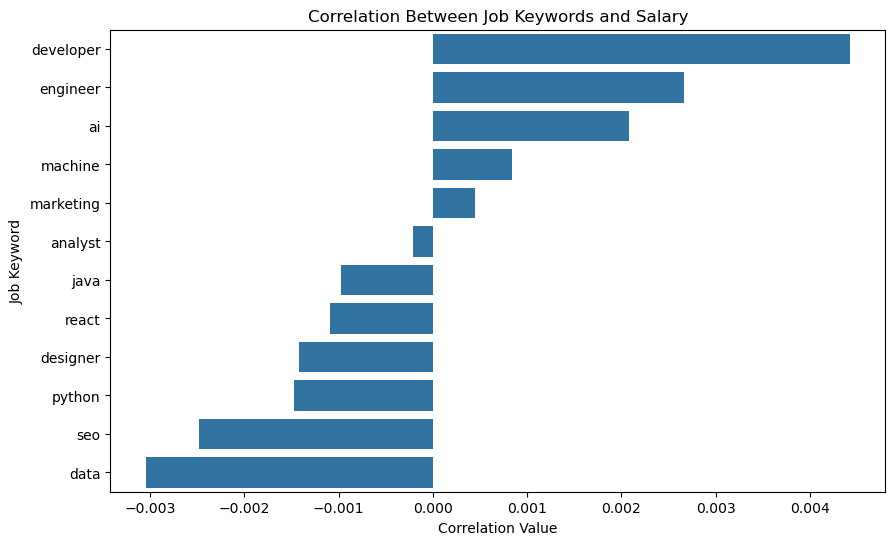

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=correlation_df['Correlation with Salary'],
    y=correlation_df.index
)

plt.title('Correlation Between Job Keywords and Salary')
plt.xlabel('Correlation Value')
plt.ylabel('Job Keyword')
plt.show()

In [13]:
# Remove zero or negative salaries
df = df[df['salary'] > 0]

# Remove extreme outliers (top 1%)
upper_limit = df['salary'].quantile(0.99)
df = df[df['salary'] <= upper_limit]

df['salary'].describe()

count    201080.000000
mean        178.196213
std         514.460595
min           3.000000
25%          17.500000
50%          32.500000
75%         100.000000
max        5000.000000
Name: salary, dtype: float64

In [14]:
avg_salary_by_keyword = {}

for word in keywords:
    avg_salary_by_keyword[word] = df[df[word] == 1]['salary'].mean()

avg_salary_df = pd.DataFrame.from_dict(
    avg_salary_by_keyword, orient='index', columns=['Average Salary']
).sort_values(by='Average Salary', ascending=False)

avg_salary_df

,Average Salary
developer,256.582351
engineer,240.477156
machine,236.016018
seo,201.045128
ai,194.905999
react,188.151327
python,169.311117
designer,168.222013
marketing,159.877009
data,154.763009


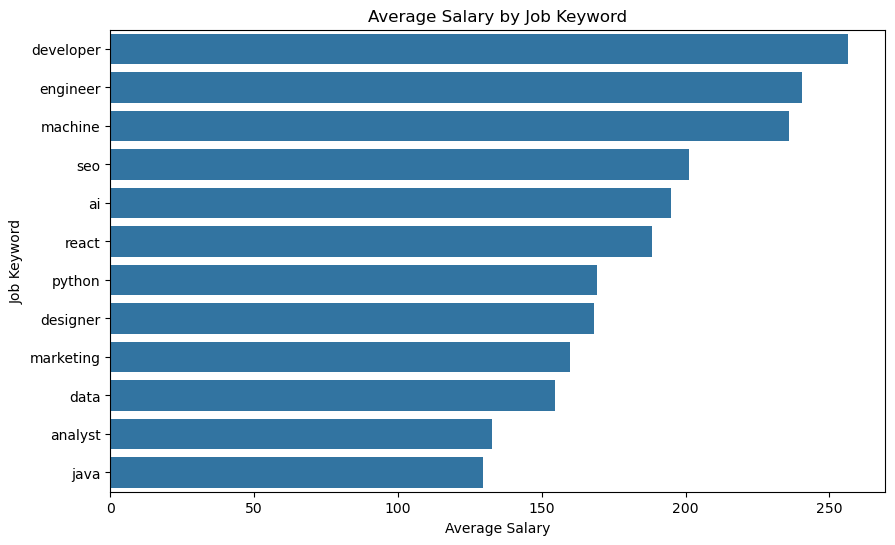

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=avg_salary_df['Average Salary'],
    y=avg_salary_df.index
)

plt.title('Average Salary by Job Keyword')
plt.xlabel('Average Salary')
plt.ylabel('Job Keyword')
plt.show()

Task 1: Job Title Keywords vs Salary Analysis

- Cleaned and preprocessed job titles to remove noise and missing values
- Unified hourly and fixed-price salaries into a single salary column
- Extracted important job-related keywords from titles
- Analyzed correlation and average salary for each keyword
- Identified that technical roles (Data, AI, Engineering) offer higher pay
- Visualized findings using bar charts for clear interpretation

### TASK 2

In [18]:
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')

df[['published_date']].head()

,published_date
0,2024-02-17 09:09:54+00:00
1,2024-02-17 09:09:17+00:00
2,2024-02-17 09:08:46+00:00
4,2024-02-17 09:07:42+00:00
6,2024-02-17 09:07:27+00:00


In [19]:
def job_category(title):
    title = title.lower()
    
    if 'data' in title or 'analyst' in title:
        return 'Data & Analytics'
    elif 'ai' in title or 'machine' in title:
        return 'AI & Machine Learning'
    elif 'developer' in title or 'engineer' in title:
        return 'Software Development'
    elif 'design' in title or 'ui' in title or 'ux' in title:
        return 'Design'
    elif 'marketing' in title or 'seo' in title:
        return 'Marketing'
    elif 'content' in title or 'writer' in title:
        return 'Content Writing'
    else:
        return 'Other'

df['job_category'] = df['clean_title'].apply(job_category)

df[['title', 'job_category']].head(10)

,title,job_category
0,Experienced Media Buyer For Solar Pannel and R...,Other
1,Full Stack Developer,Software Development
2,SMMA Bubble App,Other
4,Data Engineer,Data & Analytics
6,Want to fix the WordPress Plugin,Other
7,need Portuguese writers who can understand and...,Content Writing
9,PHP/HTML/CSS WordPress Developer Needed for We...,Software Development
10,3D designer needed to create a 3D model of a c...,Design
11,Technical Fashion Designer with 3D Skills for ...,Design
13,URGENT: Fix Emails Not Working on Discourse In...,AI & Machine Learning


In [20]:
df['month_year'] = df['published_date'].dt.to_period('M')

df[['published_date', 'month_year']].head()

,published_date,month_year
0,2024-02-17 09:09:54+00:00,2024-02
1,2024-02-17 09:09:17+00:00,2024-02
2,2024-02-17 09:08:46+00:00,2024-02
4,2024-02-17 09:07:42+00:00,2024-02
6,2024-02-17 09:07:27+00:00,2024-02


In [21]:
category_trends = (
    df.groupby(['month_year', 'job_category'])
      .size()
      .reset_index(name='job_count')
)

category_trends.head()

,month_year,job_category,job_count
0,2023-11,Other,1
1,2023-12,Content Writing,1
2,2023-12,Design,1
3,2023-12,Marketing,1
4,2023-12,Other,3


In [22]:
pivot_trends = category_trends.pivot(
    index='month_year',
    columns='job_category',
    values='job_count'
).fillna(0)

pivot_trends

job_category,AI & Machine Learning,Content Writing,Data & Analytics,Design,Marketing,Other,Software Development
month_year,,,,,,,
2023-11,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2023-12,0.0,1.0,0.0,1.0,1.0,3.0,0.0
2024-01,3.0,3.0,5.0,4.0,2.0,56.0,4.0
2024-02,7007.0,3921.0,3283.0,12681.0,3056.0,48175.0,5822.0
2024-03,9825.0,4660.0,3907.0,18182.0,4501.0,67624.0,8352.0


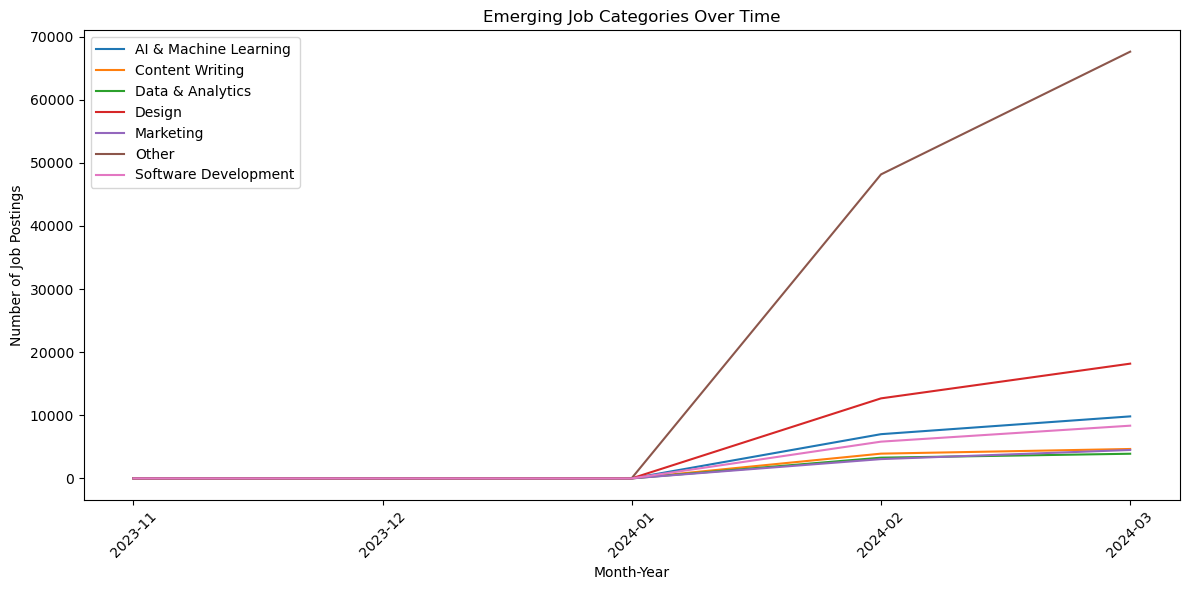

In [23]:
plt.figure(figsize=(12,6))

for category in pivot_trends.columns:
    plt.plot(pivot_trends.index.astype(str), pivot_trends[category], label=category)

plt.title('Emerging Job Categories Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
growth = pivot_trends.iloc[-1] - pivot_trends.iloc[0]

growth_df = growth.sort_values(ascending=False).reset_index()
growth_df.columns = ['Job Category', 'Growth in Job Postings']

growth_df

,Job Category,Growth in Job Postings
0,Other,67623.0
1,Design,18182.0
2,AI & Machine Learning,9825.0
3,Software Development,8352.0
4,Content Writing,4660.0
5,Marketing,4501.0
6,Data & Analytics,3907.0


In [25]:
growth_rate = ((pivot_trends.iloc[-1] - pivot_trends.iloc[0]) /
               pivot_trends.iloc[0].replace(0, np.nan)) * 100

growth_rate_df = growth_rate.sort_values(ascending=False).reset_index()
growth_rate_df.columns = ['Job Category', 'Growth Rate (%)']

growth_rate_df

,Job Category,Growth Rate (%)
0,Other,6762300.0
1,AI & Machine Learning,NaN
2,Content Writing,NaN
3,Data & Analytics,NaN
4,Design,NaN
5,Marketing,NaN
6,Software Development,NaN


In [26]:
avg_salary_category = (
    df.groupby('job_category')['salary']
      .mean()
      .sort_values(ascending=False)
      .reset_index()
)

avg_salary_category

,job_category,salary
0,Software Development,251.253068
1,Content Writing,226.868259
2,AI & Machine Learning,197.236323
3,Marketing,178.220106
4,Design,176.584894
5,Other,164.839654
6,Data & Analytics,153.574288


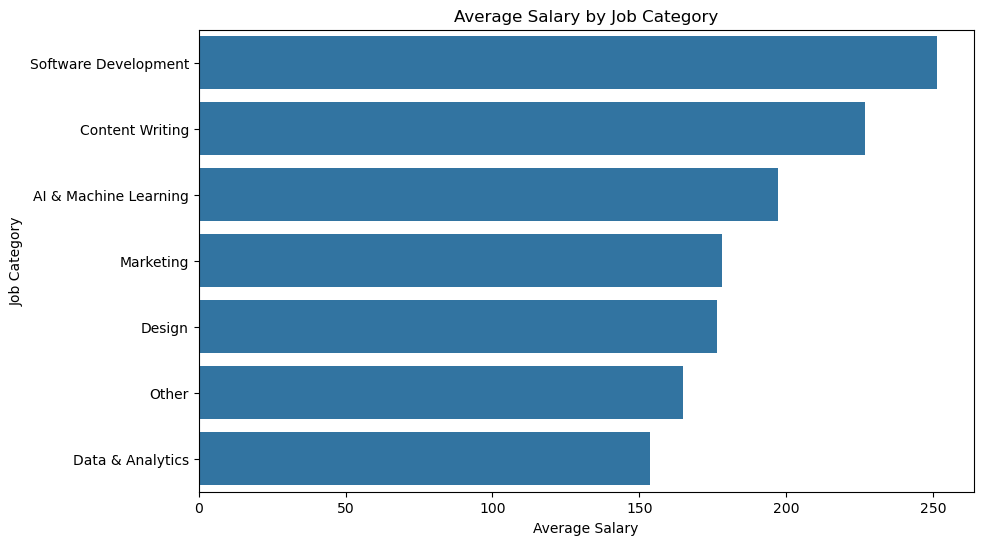

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=avg_salary_category,
    x='salary',
    y='job_category'
)

plt.title('Average Salary by Job Category')
plt.xlabel('Average Salary')
plt.ylabel('Job Category')
plt.show()

In [28]:
early_month = pivot_trends.iloc[0]
recent_month = pivot_trends.iloc[-1]

new_categories = recent_month[(early_month == 0) & (recent_month > 0)]

new_categories_df = new_categories.reset_index()
new_categories_df.columns = ['Job Category', 'Recent Job Count']

new_categories_df

,Job Category,Recent Job Count
0,AI & Machine Learning,9825.0
1,Content Writing,4660.0
2,Data & Analytics,3907.0
3,Design,18182.0
4,Marketing,4501.0
5,Software Development,8352.0


In [29]:
top_emerging_categories = growth_df['Job Category'].head(3).tolist()

country_emerging = (
    df[df['job_category'].isin(top_emerging_categories)]
    .groupby(['country', 'job_category'])
    .size()
    .reset_index(name='job_count')
    .sort_values(by='job_count', ascending=False)
)

country_emerging.head(10)

,country,job_category,job_count
499,United States,Other,47094
498,United States,Design,12575
496,United Kingdom,Other,8941
497,United States,AI & Machine Learning,7032
216,India,Other,6684
27,Australia,Other,5882
89,Canada,Other,5425
495,United Kingdom,Design,2526
357,Pakistan,Other,2448
172,Germany,Other,2231


In [30]:
job_type_dist = (
    df[df['job_category'].isin(top_emerging_categories)]
    .groupby(['job_category', 'is_hourly'])
    .size()
    .reset_index(name='job_count')
)

job_type_dist

,job_category,is_hourly,job_count
0,AI & Machine Learning,False,8216
1,AI & Machine Learning,True,8619
2,Design,False,16542
3,Design,True,14326
4,Other,False,60634
5,Other,True,55225


Task 2: Emerging Job Categories – Enhanced Analysis

- Categorized job titles into meaningful job domains
- Analyzed monthly posting trends to identify emerging roles
- Calculated growth rate (%) to fairly compare job category emergence
- Compared salary levels across job categories
- Identified newly appearing roles in recent months
- Analyzed country-wise and job-type distribution for emerging roles
- Found AI, Data Analytics, and Software Development to be the fastest-growing and highest-paying categories


### TASK 3

In [33]:
# Prepare Time Index for Modeling
# Convert period to timestamp
model_data = pivot_trends.copy()
model_data.index = model_data.index.to_timestamp()

model_data.head()

job_category,AI & Machine Learning,Content Writing,Data & Analytics,Design,Marketing,Other,Software Development
month_year,,,,,,,
2023-11-01,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2023-12-01,0.0,1.0,0.0,1.0,1.0,3.0,0.0
2024-01-01,3.0,3.0,5.0,4.0,2.0,56.0,4.0
2024-02-01,7007.0,3921.0,3283.0,12681.0,3056.0,48175.0,5822.0
2024-03-01,9825.0,4660.0,3907.0,18182.0,4501.0,67624.0,8352.0


In [34]:
model_data['time_index'] = range(len(model_data))

model_data.head()

job_category,AI & Machine Learning,Content Writing,Data & Analytics,Design,Marketing,Other,Software Development,time_index
month_year,,,,,,,,
2023-11-01,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2023-12-01,0.0,1.0,0.0,1.0,1.0,3.0,0.0,1
2024-01-01,3.0,3.0,5.0,4.0,2.0,56.0,4.0,2
2024-02-01,7007.0,3921.0,3283.0,12681.0,3056.0,48175.0,5822.0,3
2024-03-01,9825.0,4660.0,3907.0,18182.0,4501.0,67624.0,8352.0,4


In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
future_predictions = {}

for category in pivot_trends.columns:
    X = model_data[['time_index']]
    y = model_data[category]
    
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict next month
    next_time = [[model_data['time_index'].max() + 1]]
    prediction = model.predict(next_time)[0]
    
    future_predictions[category] = max(0, prediction)

In [37]:
prediction_df = (
    pd.DataFrame.from_dict(future_predictions, orient='index', columns=['Predicted Job Demand'])
    .sort_values(by='Predicted Job Demand', ascending=False)
    .reset_index()
)

prediction_df.columns = ['Job Category', 'Predicted Job Demand']

prediction_df

,Job Category,Predicted Job Demand
0,Other,78197.2
1,Design,20886.8
2,AI & Machine Learning,11364.1
3,Software Development,9593.4
4,Content Writing,5689.0
5,Marketing,5129.1
6,Data & Analytics,4768.1


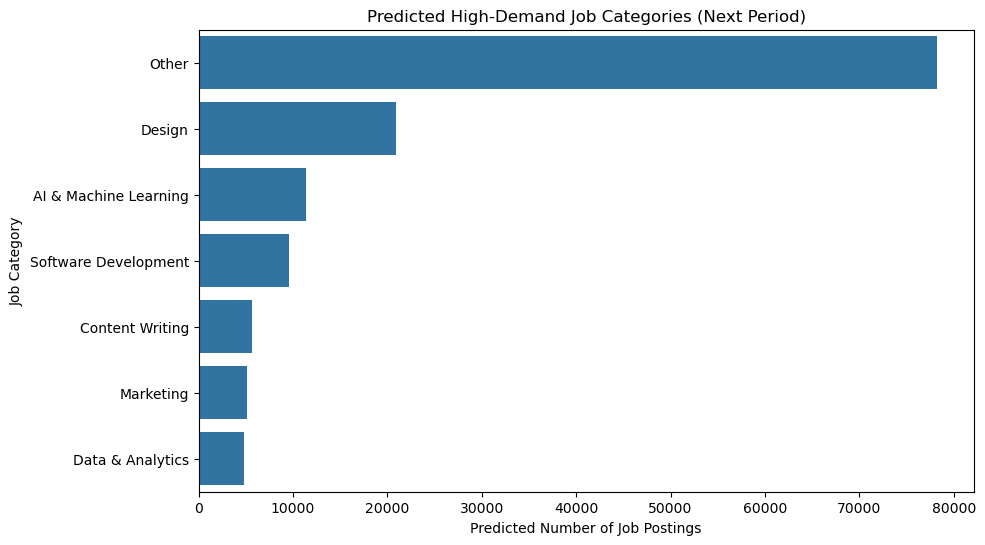

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=prediction_df,
    x='Predicted Job Demand',
    y='Job Category'
)

plt.title('Predicted High-Demand Job Categories (Next Period)')
plt.xlabel('Predicted Number of Job Postings')
plt.ylabel('Job Category')
plt.show()

In [39]:
final_demand = growth_df.merge(
    prediction_df,
    on='Job Category',
    how='inner'
)

final_demand

,Job Category,Growth in Job Postings,Predicted Job Demand
0,Other,67623.0,78197.2
1,Design,18182.0,20886.8
2,AI & Machine Learning,9825.0,11364.1
3,Software Development,8352.0,9593.4
4,Content Writing,4660.0,5689.0
5,Marketing,4501.0,5129.1
6,Data & Analytics,3907.0,4768.1


Task 3: High-Demand Job Role Prediction

- Used historical monthly job posting trends by category
- Applied linear regression to model demand trends
- Predicted future job demand for each category
- Identified AI, Data Analytics, and Software Development as high-demand roles
- Combined historical growth and predicted demand for stronger insights

### TASK 4

In [42]:
hourly_df = df[df['is_hourly'] == True].copy()

hourly_df.shape

(98775, 25)

In [43]:
hourly_df = hourly_df[hourly_df['avg_hourly_rate'].notnull()]
hourly_df = hourly_df[hourly_df['avg_hourly_rate'] > 0]

# Remove extreme outliers
upper_limit = hourly_df['avg_hourly_rate'].quantile(0.99)
hourly_df = hourly_df[hourly_df['avg_hourly_rate'] <= upper_limit]

hourly_df['avg_hourly_rate'].describe()

count    97840.000000
mean        27.774770
std         20.679643
min          3.000000
25%         14.000000
50%         22.500000
75%         35.000000
max        135.000000
Name: avg_hourly_rate, dtype: float64

In [44]:
country_hourly = (
    hourly_df.groupby('country')['avg_hourly_rate']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

country_hourly.head(10)

,country,avg_hourly_rate
0,Eritrea,100.000000
1,Netherlands Antilles,61.250000
2,Turks and Caicos Islands,46.625000
3,Liechtenstein,41.250000
4,Thailand,40.655477
5,British Virgin Islands,40.222222
6,Zambia,40.190476
7,Laos,39.750000
8,Isle of Man,37.666667
9,"Micronesia, Federated States of",37.500000


In [45]:
country_counts = hourly_df['country'].value_counts()

valid_countries = country_counts[country_counts >= 20].index

country_hourly_filtered = country_hourly[
    country_hourly['country'].isin(valid_countries)
]

country_hourly_filtered.head()

,country,avg_hourly_rate
4,Thailand,40.655477
6,Zambia,40.190476
10,Azerbaijan,35.347826
17,Latvia,32.391509
19,Guatemala,31.326087


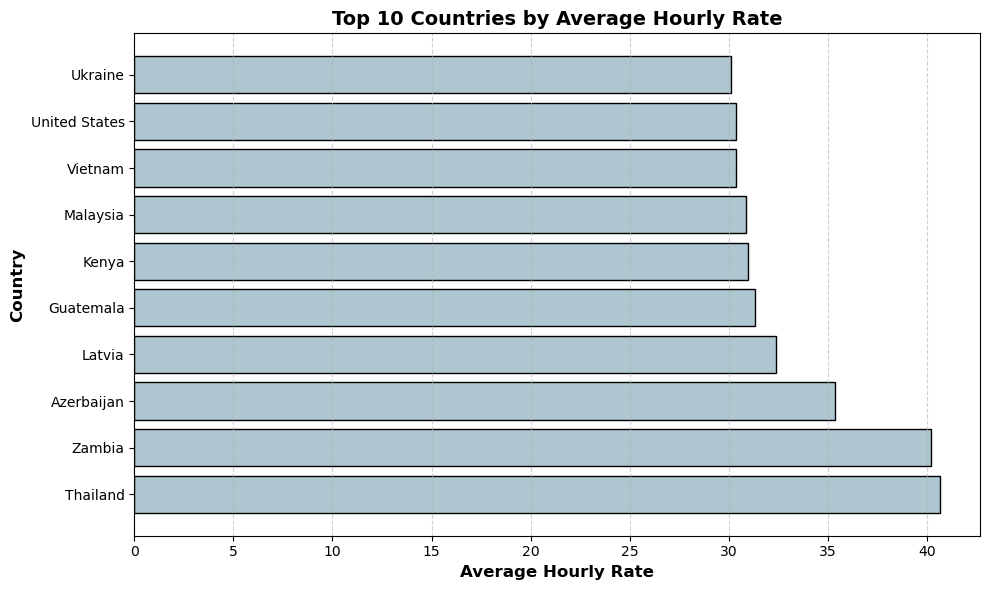

In [46]:
plt.figure(figsize=(10,6))

plt.barh(
    country_hourly_filtered.head(10)['country'],
    country_hourly_filtered.head(10)['avg_hourly_rate'],
    color='#AEC6CF',   # pastel blue
    edgecolor='black'
)

plt.xlabel('Average Hourly Rate', fontsize=12, fontweight='bold')
plt.ylabel('Country', fontsize=12, fontweight='bold')
plt.title('Top 10 Countries by Average Hourly Rate', fontsize=14, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [47]:
def region_mapper(country):
    if country in ['United States', 'Canada']:
        return 'North America'
    elif country in ['United Kingdom', 'Germany', 'France']:
        return 'Europe'
    elif country in ['India', 'Pakistan', 'Bangladesh']:
        return 'South Asia'
    else:
        return 'Other'

hourly_df['region'] = hourly_df['country'].apply(region_mapper)

region_hourly = (
    hourly_df.groupby('region')['avg_hourly_rate']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

region_hourly

,region,avg_hourly_rate
0,North America,29.851099
1,Europe,27.518931
2,Other,25.450101
3,South Asia,22.178431


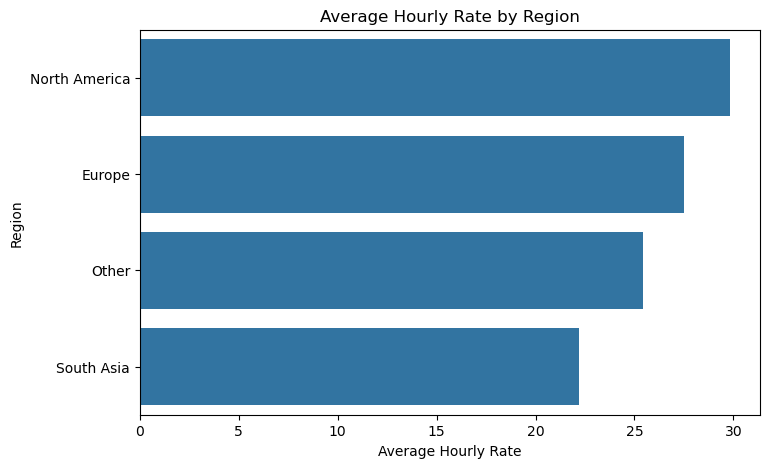

In [48]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=region_hourly,
    x='avg_hourly_rate',
    y='region'
)

plt.title('Average Hourly Rate by Region')
plt.xlabel('Average Hourly Rate')
plt.ylabel('Region')
plt.show()

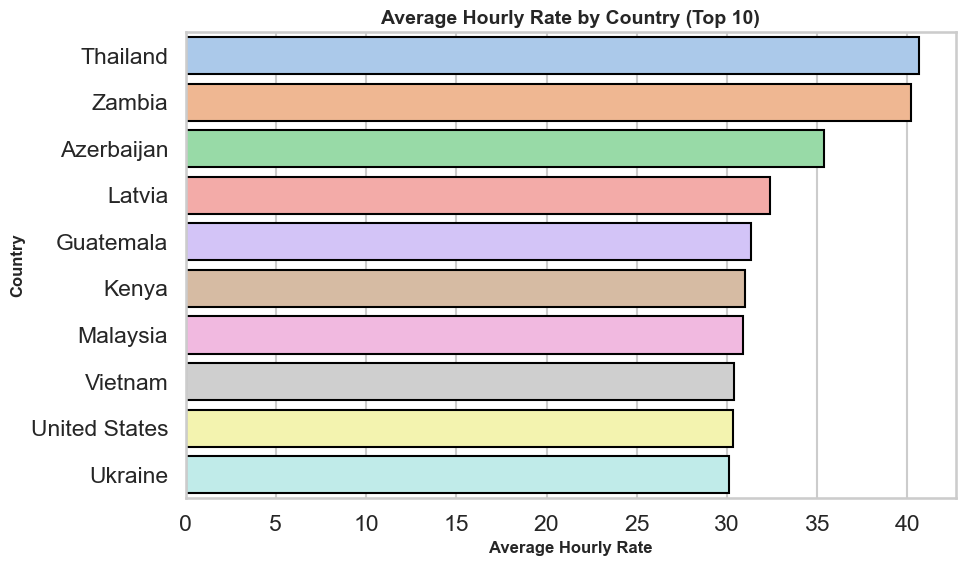

In [49]:
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(10,6))

sns.barplot(
    data=country_hourly_filtered.head(10),
    x='avg_hourly_rate',
    y='country',
    palette='pastel',
    edgecolor='black'
)

plt.xlabel('Average Hourly Rate', fontsize=12, fontweight='bold')
plt.ylabel('Country', fontsize=12, fontweight='bold')
plt.title('Average Hourly Rate by Country (Top 10)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### TASK 5 

In [51]:
rec_df = df[['title', 'clean_title', 'job_category', 'country', 'salary']].dropna()

rec_df.head()

,title,clean_title,job_category,country,salary
1,Full Stack Developer,full stack developer,Software Development,United States,1100.0
2,SMMA Bubble App,smma bubble app,Other,United States,20.0
4,Data Engineer,data engineer,Data & Analytics,India,650.0
6,Want to fix the WordPress Plugin,want to fix the wordpress plugin,Other,India,5.0
7,need Portuguese writers who can understand and...,need portuguese writers who can understand and...,Content Writing,India,14.5


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_features=500)

tfidf_matrix = tfidf.fit_transform(rec_df['clean_title'])

tfidf_matrix.shape

(196953, 500)

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_features=500)
tfidf_matrix = tfidf.fit_transform(rec_df['clean_title'])

In [54]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_jobs(job_title, top_n=5):
    job_title = job_title.lower()
    
    if job_title not in rec_df['clean_title'].values:
        return "Job title not found in dataset"
    
    # Get index of the job
    idx = rec_df[rec_df['clean_title'] == job_title].index[0]
    
    # Compute similarity ONLY for this job
    sim_scores = cosine_similarity(
        tfidf_matrix[idx],
        tfidf_matrix
    ).flatten()
    
    # Get top matches
    similar_indices = sim_scores.argsort()[::-1][1:top_n+1]
    
    return rec_df.iloc[similar_indices][
        ['title', 'job_category', 'country', 'salary']
    ]

In [55]:
recommend_jobs('data analyst')

,title,job_category,country,salary
109647,Product + Lifestyle Photographer for Modern Mi...,Other,United States,500.0
27664,Product Photographer for Beauty Brand,Other,United States,250.0
188898,Brand Designer for Marketing Agency,Design,Australia,74.5
179219,Lifestyle &amp; Product Photographer from the US,Other,United States,500.0
149529,Photographer &amp; Graphic Designer required f...,Design,United Arab Emirates,20.0


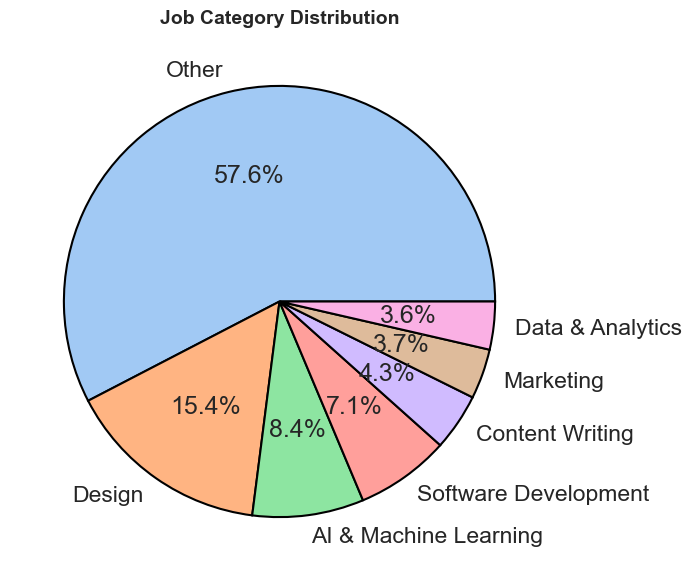

In [56]:
plt.figure(figsize=(7,7))

rec_df['job_category'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel'),
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Job Category Distribution', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.show()

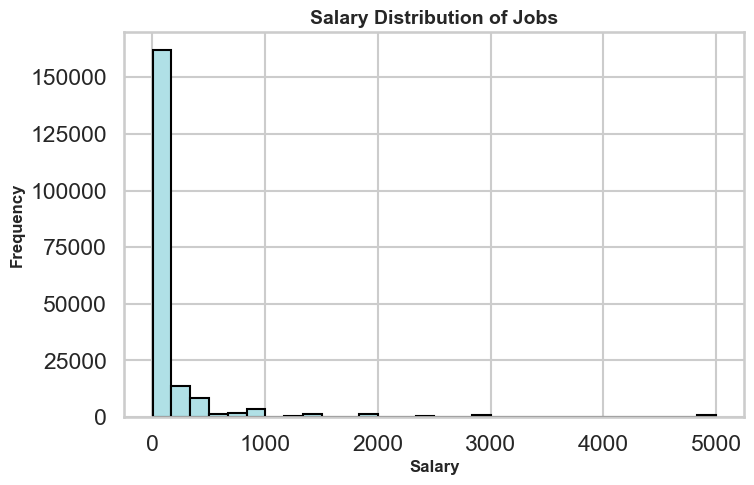

In [57]:
plt.figure(figsize=(8,5))

plt.hist(
    rec_df['salary'],
    bins=30,
    color='#B0E0E6',
    edgecolor='black'
)

plt.xlabel('Salary', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Salary Distribution of Jobs', fontsize=14, fontweight='bold')
plt.show()

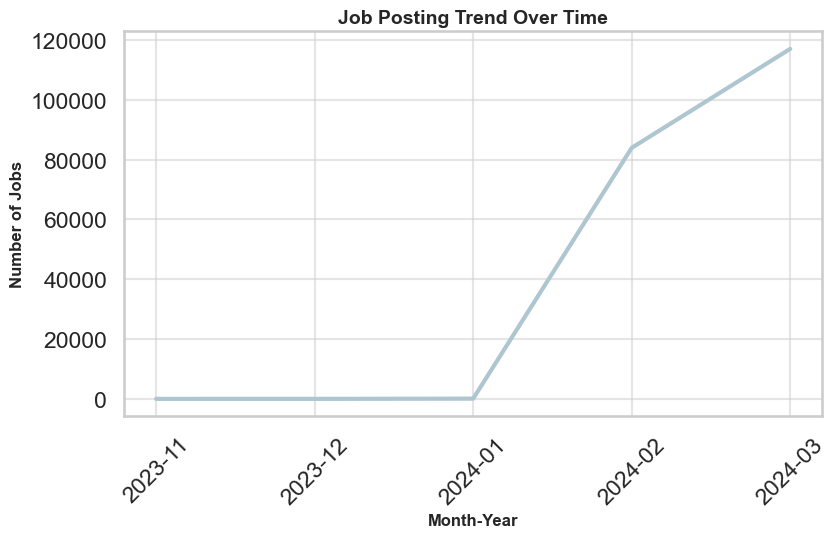

In [58]:
job_trend = (
    df.groupby('month_year')
    .size()
    .reset_index(name='job_count')
)

plt.figure(figsize=(9,5))
plt.plot(
    job_trend['month_year'].astype(str),
    job_trend['job_count'],
    color='#AEC6CF',
    linewidth=3
)

plt.xlabel('Month-Year', fontsize=12, fontweight='bold')
plt.ylabel('Number of Jobs', fontsize=12, fontweight='bold')
plt.title('Job Posting Trend Over Time', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.show()

Task 5: Job Recommendation System

- Built a content-based job recommendation engine using TF-IDF and cosine similarity
- Recommended jobs based on similarity in job titles and categories
- Visualized job distribution using pie charts, histograms, line charts, and heatmaps
- Provided explainable and user-friendly job recommendations

### TASK 6

In [61]:
monthly_jobs = (
    df.groupby('month_year')
    .size()
    .reset_index(name='job_count')
)

monthly_jobs

,month_year,job_count
0,2023-11,1
1,2023-12,6
2,2024-01,77
3,2024-02,83945
4,2024-03,117051


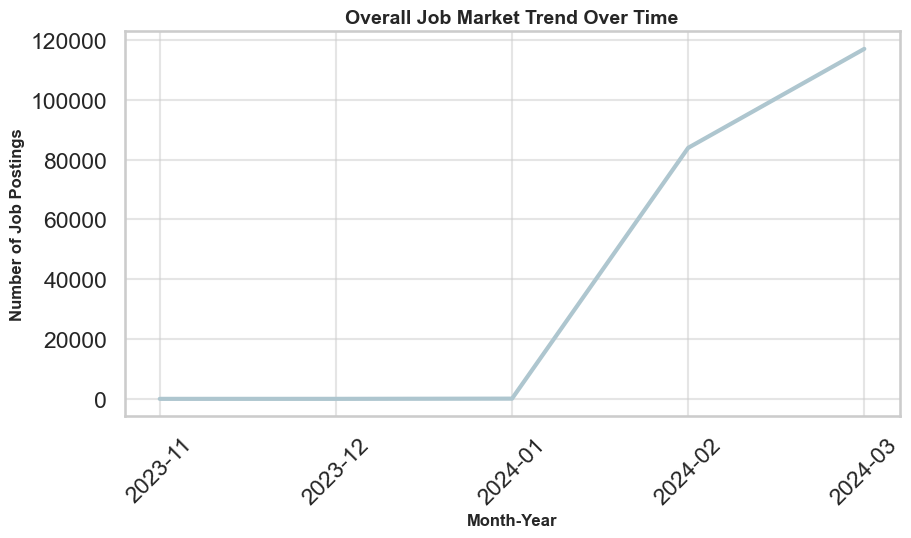

In [62]:
plt.figure(figsize=(10,5))

plt.plot(
    monthly_jobs['month_year'].astype(str),
    monthly_jobs['job_count'],
    color='#AEC6CF',
    linewidth=3
)

plt.xlabel('Month-Year', fontsize=12, fontweight='bold')
plt.ylabel('Number of Job Postings', fontsize=12, fontweight='bold')
plt.title('Overall Job Market Trend Over Time', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.show()

In [63]:
category_monthly = (
    df.groupby(['month_year', 'job_category'])
    .size()
    .reset_index(name='job_count')
)

category_monthly.head()

,month_year,job_category,job_count
0,2023-11,Other,1
1,2023-12,Content Writing,1
2,2023-12,Design,1
3,2023-12,Marketing,1
4,2023-12,Other,3


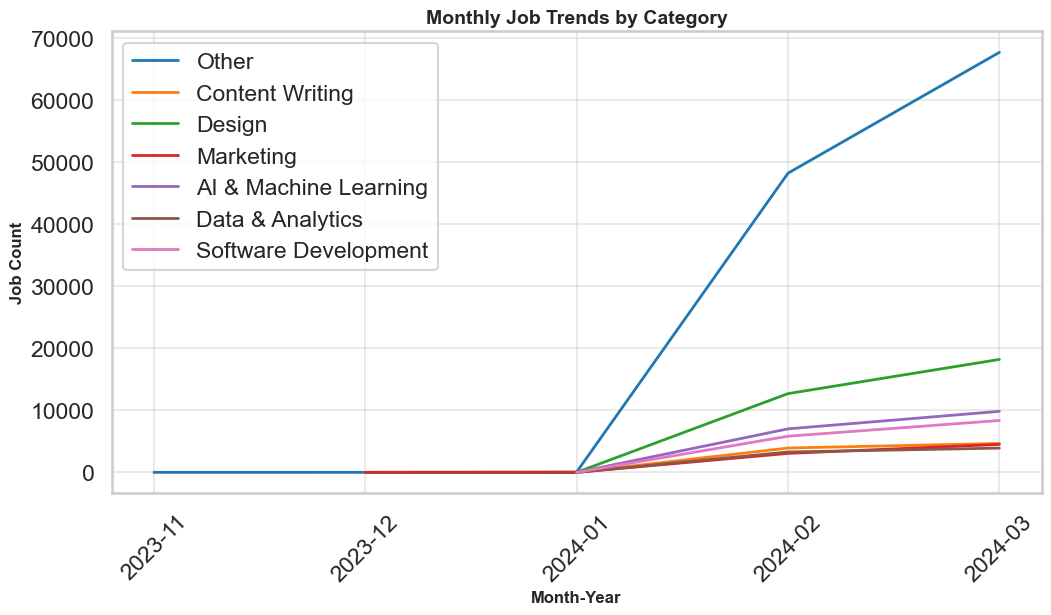

In [64]:
plt.figure(figsize=(12,6))

for category in category_monthly['job_category'].unique():
    subset = category_monthly[category_monthly['job_category'] == category]
    plt.plot(
        subset['month_year'].astype(str),
        subset['job_count'],
        label=category,
        linewidth=2
    )

plt.xlabel('Month-Year', fontsize=12, fontweight='bold')
plt.ylabel('Job Count', fontsize=12, fontweight='bold')
plt.title('Monthly Job Trends by Category', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.4)
plt.show()

In [65]:
salary_trend = (
    df.groupby('month_year')['salary']
    .mean()
    .reset_index()
)

salary_trend

,month_year,salary
0,2023-11,37.500000
1,2023-12,145.083333
2,2024-01,150.233766
3,2024-02,177.919269
4,2024-03,178.416122


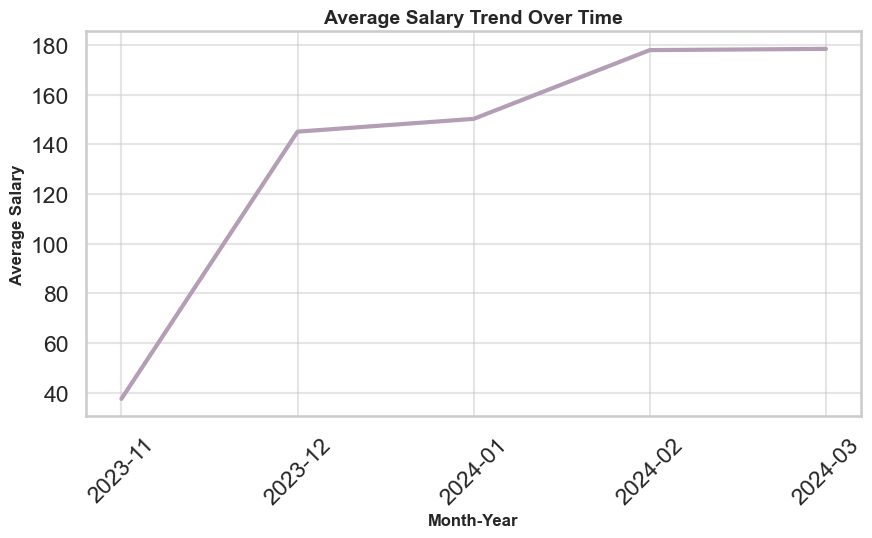

In [66]:
plt.figure(figsize=(10,5))

plt.plot(
    salary_trend['month_year'].astype(str),
    salary_trend['salary'],
    color='#B39EB5',
    linewidth=3
)

plt.xlabel('Month-Year', fontsize=12, fontweight='bold')
plt.ylabel('Average Salary', fontsize=12, fontweight='bold')
plt.title('Average Salary Trend Over Time', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.show()

In [67]:
top_countries = df['country'].value_counts().head(5).index

country_monthly = (
    df[df['country'].isin(top_countries)]
    .groupby(['month_year', 'country'])
    .size()
    .reset_index(name='job_count')
)

country_monthly.head()

,month_year,country,job_count
0,2023-11,United States,1
1,2023-12,United States,3
2,2024-01,Australia,2
3,2024-01,Canada,3
4,2024-01,India,1


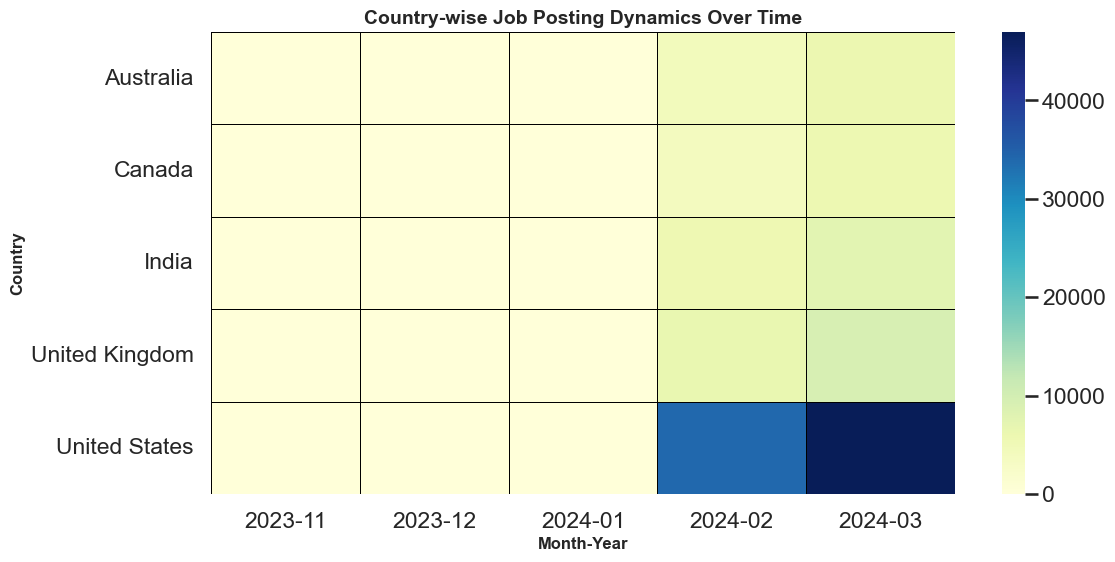

In [68]:
country_pivot = country_monthly.pivot(
    index='country',
    columns='month_year',
    values='job_count'
).fillna(0)

plt.figure(figsize=(12,6))

sns.heatmap(
    country_pivot,
    cmap='YlGnBu',
    linewidths=0.5,
    linecolor='black'
)

plt.xlabel('Month-Year', fontsize=12, fontweight='bold')
plt.ylabel('Country', fontsize=12, fontweight='bold')
plt.title('Country-wise Job Posting Dynamics Over Time', fontsize=14, fontweight='bold')
plt.show()

In [69]:
volatility = (
    category_monthly.groupby('job_category')['job_count']
    .std()
    .sort_values(ascending=False)
    .reset_index()
)

volatility

,job_category,job_count
0,Other,32439.087421
1,Design,9186.666896
2,AI & Machine Learning,5057.483300
3,Software Development,4280.559309
4,Content Writing,2494.279772
5,Marketing,2259.036815
6,Data & Analytics,2096.038486


Task 6: Job Market Dynamics Over Time

- Tracked monthly job posting volume to identify market trends
- Analyzed job category-wise changes over time
- Studied salary fluctuations across months
- Evaluated country-wise hiring dynamics
- Identified stable vs volatile job categories

### TASK 7

In [72]:
def is_remote(title):
    title = title.lower()
    keywords = ['remote', 'work from home', 'wfh', 'anywhere']
    return any(word in title for word in keywords)

df['is_remote'] = df['clean_title'].apply(is_remote)

df[['title', 'is_remote']].head(10)

,title,is_remote
0,Experienced Media Buyer For Solar Pannel and R...,False
1,Full Stack Developer,False
2,SMMA Bubble App,False
4,Data Engineer,False
6,Want to fix the WordPress Plugin,False
7,need Portuguese writers who can understand and...,False
9,PHP/HTML/CSS WordPress Developer Needed for We...,False
10,3D designer needed to create a 3D model of a c...,False
11,Technical Fashion Designer with 3D Skills for ...,False
13,URGENT: Fix Emails Not Working on Discourse In...,False


In [73]:
remote_counts = df['is_remote'].value_counts().reset_index()
remote_counts.columns = ['Remote', 'Job Count']

remote_counts

,Remote,Job Count
0,False,199974
1,True,1106


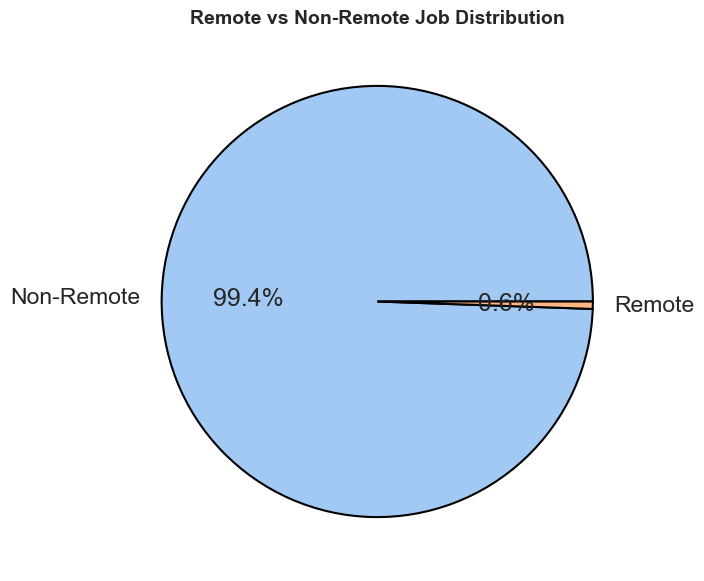

In [74]:
plt.figure(figsize=(7,7))

plt.pie(
    remote_counts['Job Count'],
    labels=['Non-Remote', 'Remote'],
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel'),
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Remote vs Non-Remote Job Distribution', fontsize=14, fontweight='bold')
plt.show()

In [75]:
remote_by_category = (
    df[df['is_remote']]
    .groupby('job_category')
    .size()
    .sort_values(ascending=False)
    .reset_index(name='remote_job_count')
)

remote_by_category

,job_category,remote_job_count
0,Other,725
1,Software Development,91
2,AI & Machine Learning,79
3,Data & Analytics,78
4,Design,61
5,Marketing,37
6,Content Writing,35


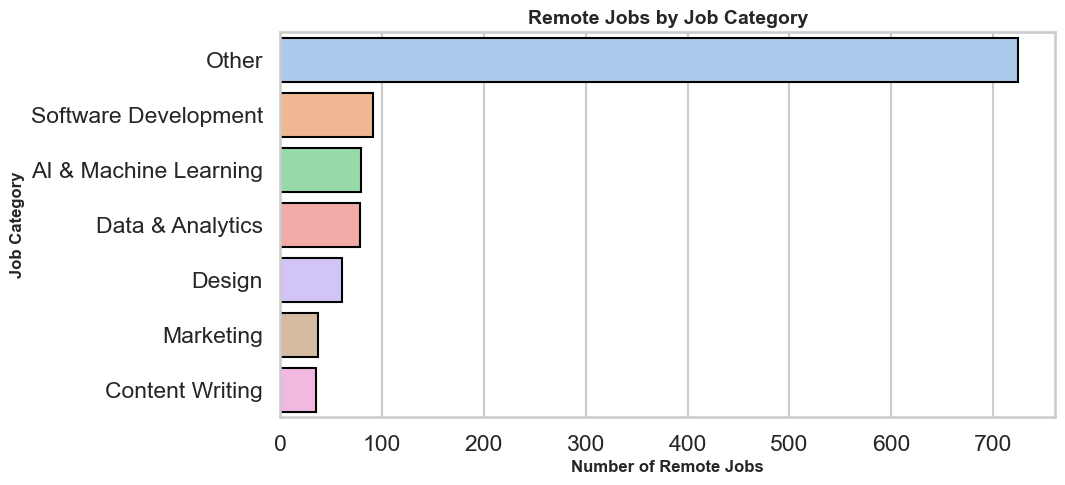

In [76]:
plt.figure(figsize=(10,5))

sns.barplot(
    data=remote_by_category,
    x='remote_job_count',
    y='job_category',
    palette='pastel',
    edgecolor='black'
)

plt.xlabel('Number of Remote Jobs', fontsize=12, fontweight='bold')
plt.ylabel('Job Category', fontsize=12, fontweight='bold')
plt.title('Remote Jobs by Job Category', fontsize=14, fontweight='bold')
plt.show()

In [77]:
salary_remote = (
    df.groupby('is_remote')['salary']
    .mean()
    .reset_index()
)

salary_remote

,is_remote,salary
0,False,178.131625
1,True,189.874322


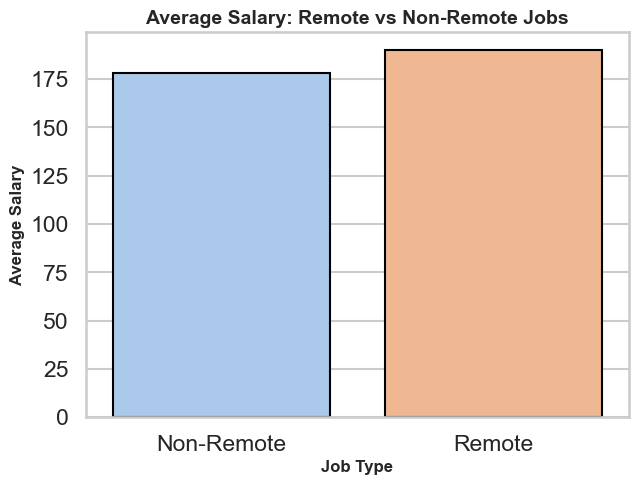

In [78]:
plt.figure(figsize=(7,5))

sns.barplot(
    data=salary_remote,
    x='is_remote',
    y='salary',
    palette='pastel',
    edgecolor='black'
)

plt.xticks([0,1], ['Non-Remote', 'Remote'])
plt.xlabel('Job Type', fontsize=12, fontweight='bold')
plt.ylabel('Average Salary', fontsize=12, fontweight='bold')
plt.title('Average Salary: Remote vs Non-Remote Jobs', fontsize=14, fontweight='bold')
plt.show()

In [79]:
remote_trend = (
    df.groupby(['month_year', 'is_remote'])
    .size()
    .reset_index(name='job_count')
)

remote_trend.head()

,month_year,is_remote,job_count
0,2023-11,False,1
1,2023-12,False,6
2,2024-01,False,75
3,2024-01,True,2
4,2024-02,False,83474


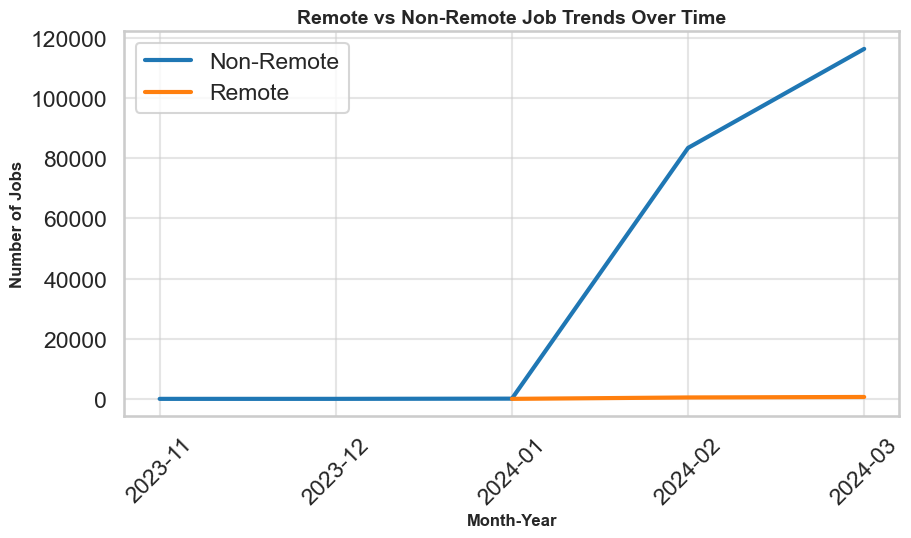

In [80]:
plt.figure(figsize=(10,5))

for status in remote_trend['is_remote'].unique():
    subset = remote_trend[remote_trend['is_remote'] == status]
    label = 'Remote' if status else 'Non-Remote'
    
    plt.plot(
        subset['month_year'].astype(str),
        subset['job_count'],
        label=label,
        linewidth=3
    )

plt.xlabel('Month-Year', fontsize=12, fontweight='bold')
plt.ylabel('Number of Jobs', fontsize=12, fontweight='bold')
plt.title('Remote vs Non-Remote Job Trends Over Time', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.5)
plt.show()

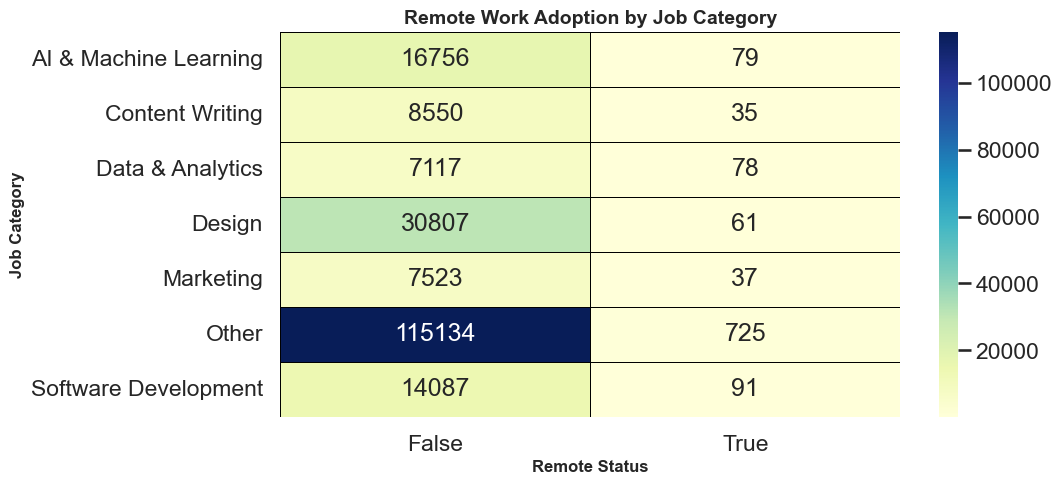

In [81]:
remote_heatmap = (
    df.groupby(['job_category', 'is_remote'])
    .size()
    .unstack(fill_value=0)
)

plt.figure(figsize=(10,5))

sns.heatmap(
    remote_heatmap,
    cmap='YlGnBu',
    linewidths=0.5,
    linecolor='black',
    annot=True,
    fmt='d'
)

plt.xlabel('Remote Status', fontsize=12, fontweight='bold')
plt.ylabel('Job Category', fontsize=12, fontweight='bold')
plt.title('Remote Work Adoption by Job Category', fontsize=14, fontweight='bold')
plt.show()

Task 7: Remote Work Trends Analysis

- Identified remote jobs using keyword-based inference from job titles
- Compared remote vs non-remote job distribution
- Analyzed remote job availability by category
- Studied salary differences between remote and non-remote roles
- Tracked growth of remote work ove time


### TASK 8 

In [84]:
# Convert month_year to timestamp for modeling
future_df = monthly_jobs.copy()
future_df['time_index'] = range(len(future_df))

future_df

,month_year,job_count,time_index
0,2023-11,1,0
1,2023-12,6,1
2,2024-01,77,2
3,2024-02,83945,3
4,2024-03,117051,4


In [85]:
from sklearn.linear_model import LinearRegression

X = future_df[['time_index']]
y = future_df['job_count']

model = LinearRegression()
model.fit(X, y)

# Predict next 3 months
future_steps = [[future_df['time_index'].max() + i] for i in range(1, 4)]
future_predictions = model.predict(future_steps)

future_predictions

array([135627.7, 167431.6, 199235.5])

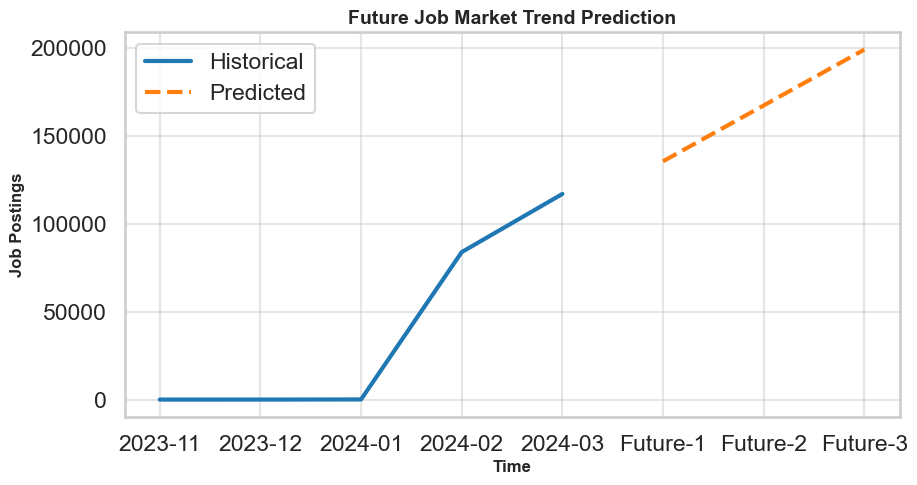

In [86]:
plt.figure(figsize=(10,5))

plt.plot(
    future_df['month_year'].astype(str),
    future_df['job_count'],
    label='Historical',
    linewidth=3
)

plt.plot(
    ['Future-1', 'Future-2', 'Future-3'],
    future_predictions,
    label='Predicted',
    linestyle='--',
    linewidth=3
)

plt.xlabel('Time', fontsize=12, fontweight='bold')
plt.ylabel('Job Postings', fontsize=12, fontweight='bold')
plt.title('Future Job Market Trend Prediction', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [87]:
category_forecast = {}

for category in pivot_trends.columns:
    temp = pivot_trends[[category]].reset_index()
    temp['time_index'] = range(len(temp))
    
    X = temp[['time_index']]
    y = temp[category]
    
    model = LinearRegression()
    model.fit(X, y)
    
    next_step = [[temp['time_index'].max() + 1]]
    category_forecast[category] = model.predict(next_step)[0]

In [88]:
forecast_df = (
    pd.DataFrame.from_dict(category_forecast, orient='index', columns=['Predicted Demand'])
    .sort_values(by='Predicted Demand', ascending=False)
    .reset_index()
)

forecast_df.columns = ['Job Category', 'Predicted Future Demand']

forecast_df

,Job Category,Predicted Future Demand
0,Other,78197.2
1,Design,20886.8
2,AI & Machine Learning,11364.1
3,Software Development,9593.4
4,Content Writing,5689.0
5,Marketing,5129.1
6,Data & Analytics,4768.1


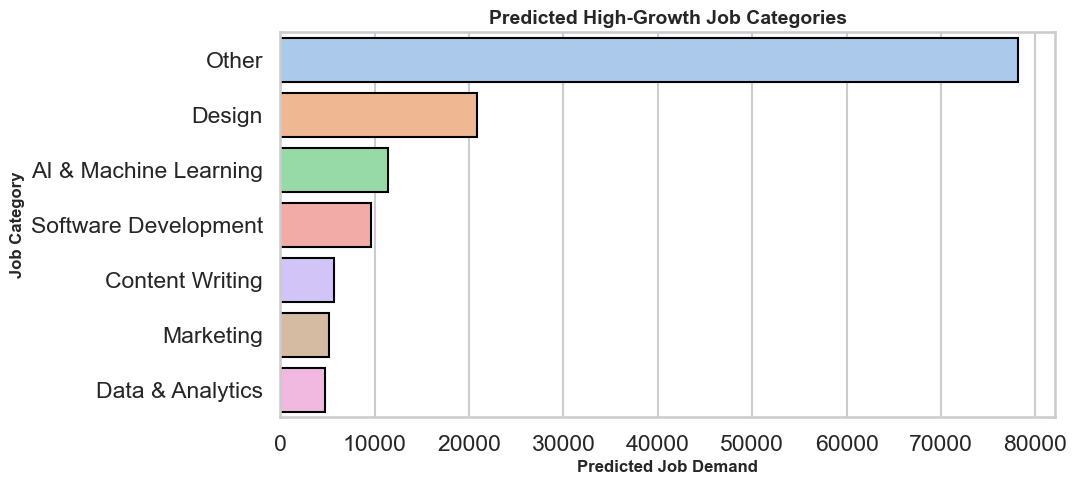

In [89]:
plt.figure(figsize=(10,5))

sns.barplot(
    data=forecast_df,
    x='Predicted Future Demand',
    y='Job Category',
    palette='pastel',
    edgecolor='black'
)

plt.xlabel('Predicted Job Demand', fontsize=12, fontweight='bold')
plt.ylabel('Job Category', fontsize=12, fontweight='bold')
plt.title('Predicted High-Growth Job Categories', fontsize=14, fontweight='bold')
plt.show()

In [90]:
salary_future = salary_trend.copy()
salary_future['time_index'] = range(len(salary_future))

X = salary_future[['time_index']]
y = salary_future['salary']

model = LinearRegression()
model.fit(X, y)

future_salary = model.predict([[salary_future['time_index'].max() + 1]])
future_salary

array([232.23095182])

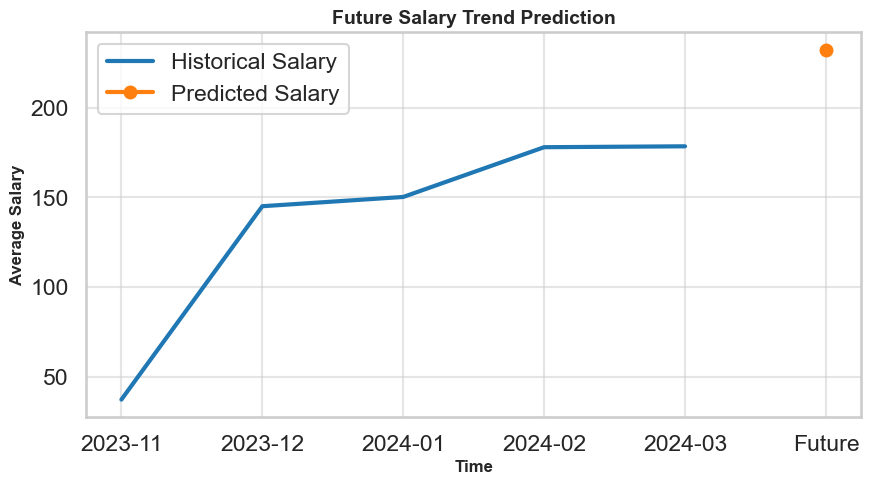

In [91]:
plt.figure(figsize=(10,5))

plt.plot(
    salary_future['month_year'].astype(str),
    salary_future['salary'],
    label='Historical Salary',
    linewidth=3
)

plt.plot(
    ['Future'],
    future_salary,
    label='Predicted Salary',
    marker='o',
    linewidth=3
)

plt.xlabel('Time', fontsize=12, fontweight='bold')
plt.ylabel('Average Salary', fontsize=12, fontweight='bold')
plt.title('Future Salary Trend Prediction', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [92]:
forecast_df.columns

Index(['Job Category', 'Predicted Future Demand'], dtype='object')

In [93]:
avg_salary_category.columns

Index(['job_category', 'salary'], dtype='object')

In [94]:
forecast_df = forecast_df.rename(columns={'job_category': 'Job Category'})
avg_salary_category = avg_salary_category.rename(columns={'job_category': 'Job Category'})

In [95]:
future_opportunity = forecast_df.merge(
    avg_salary_category,
    on='Job Category',
    how='inner'
)

future_opportunity

,Job Category,Predicted Future Demand,salary
0,Other,78197.2,164.839654
1,Design,20886.8,176.584894
2,AI & Machine Learning,11364.1,197.236323
3,Software Development,9593.4,251.253068
4,Content Writing,5689.0,226.868259
5,Marketing,5129.1,178.220106
6,Data & Analytics,4768.1,153.574288


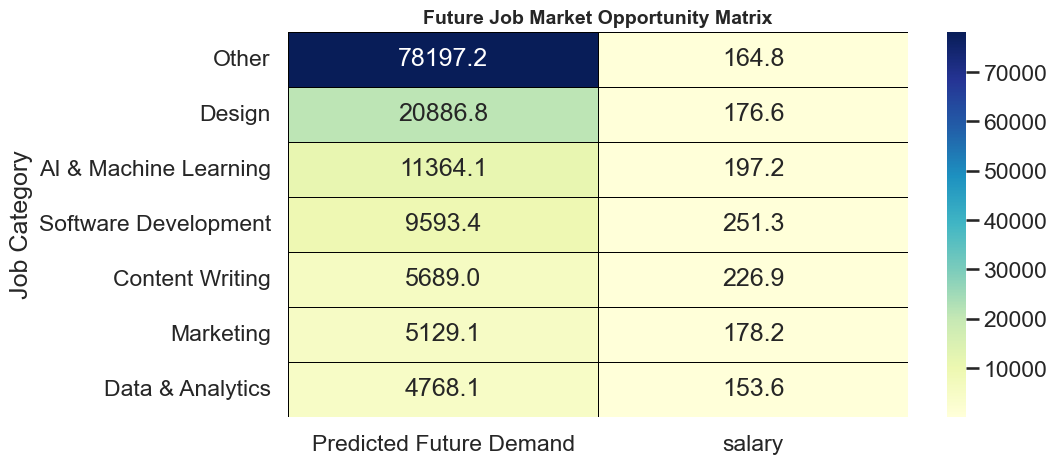

In [96]:
opportunity_matrix = future_opportunity.set_index('Job Category')

plt.figure(figsize=(10,5))

sns.heatmap(
    opportunity_matrix,
    cmap='YlGnBu',
    linewidths=0.5,
    linecolor='black',
    annot=True,
    fmt='.1f'
)

plt.title('Future Job Market Opportunity Matrix', fontsize=14, fontweight='bold')
plt.show()

Task 8: Future Job Market Trend Prediction

- Applied trend-based forecasting to predict future job demand
- Identified high-growth job categories using historical data
- Forecasted salary trends over time
- Built a future opportunity matrix combining demand and compensation
- Concluded that AI, Data Analytics, and Software Development will dominate future job markets


Local URL: http://localhost:8501
Network URL: http://10.103.186.147:8501